Dimensiones: (131741, 22)

Variables:
fecha_y_hora    datetime64[ns]
co                     float64
no                     float64
no2                    float64
nox                    float64
o3                     float64
pm10                   float64
pm2_5                  float64
prs                    float64
rainf                  float64
rh                     float64
so2                    float64
sr                     float64
tout                   float64
wsr                    float64
wdr                    float64
estacion                object
date                    object
year                     int64
month                    int64
day                      int64
hour                     int64
dtype: object

% de nulos por variable:
fecha_y_hora    0.000000
co              0.000000
no              0.000000
no2             0.000000
nox             0.000000
o3              0.000000
pm10            0.000000
pm2_5           6.666110
prs             0.000000
rainf          

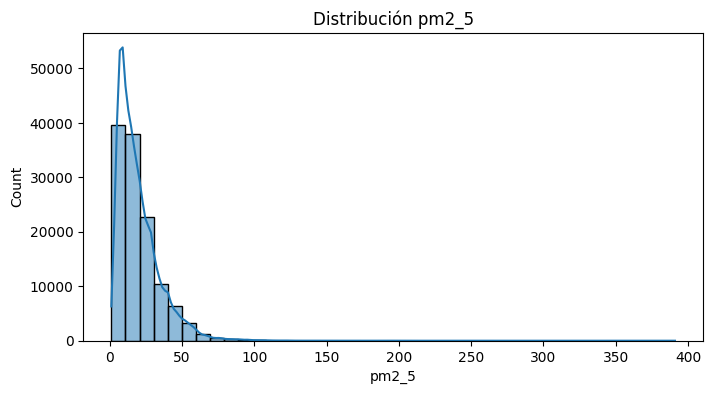

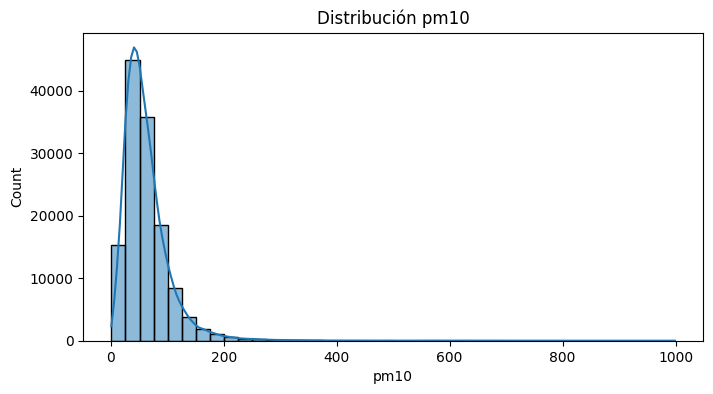

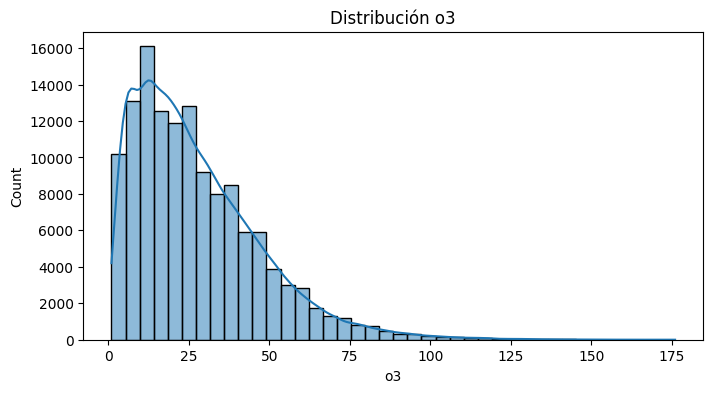

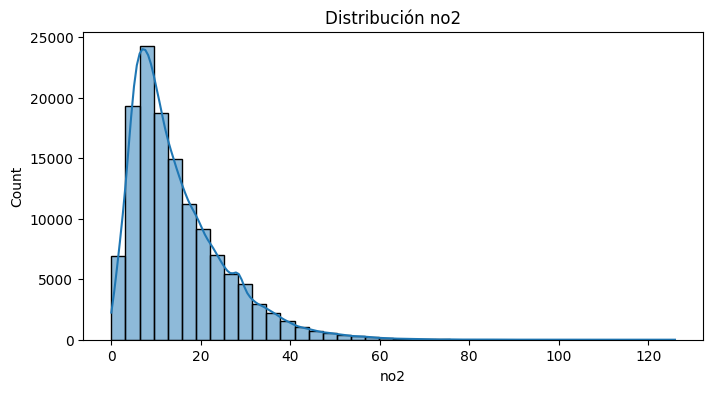

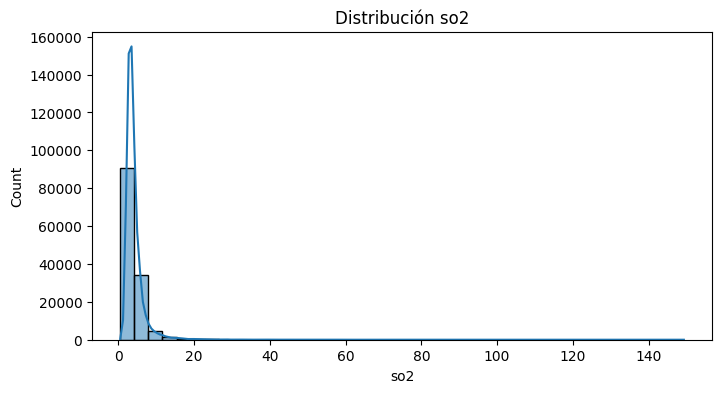

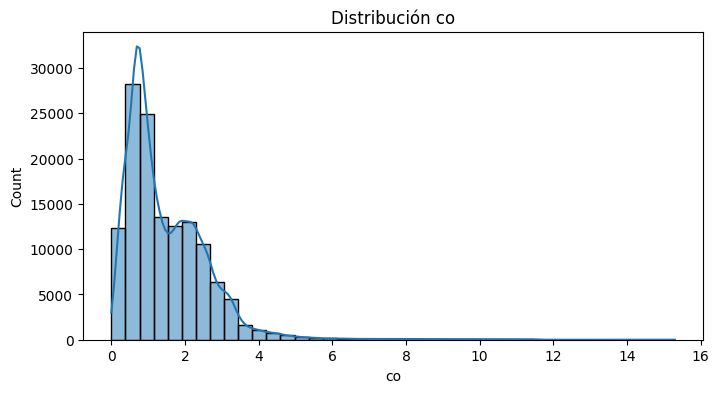

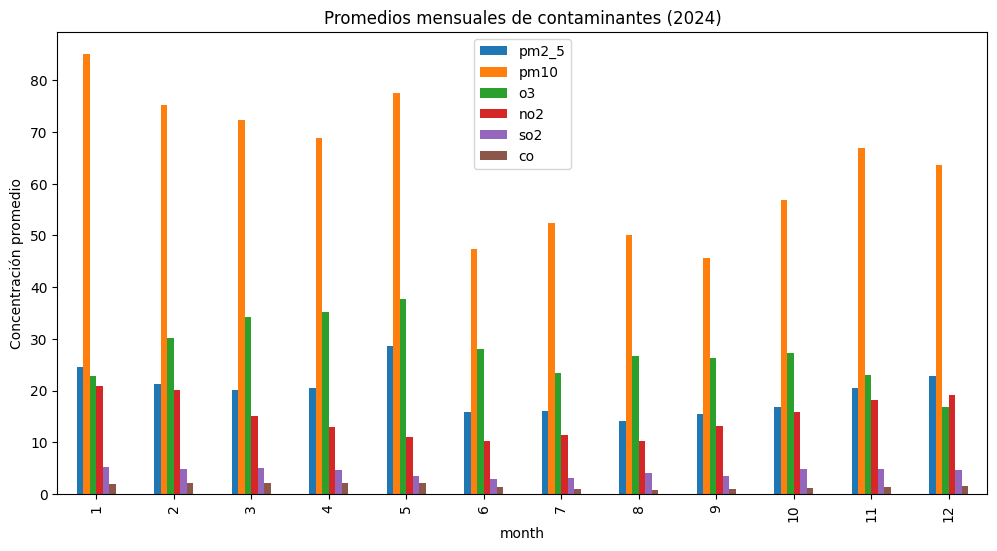

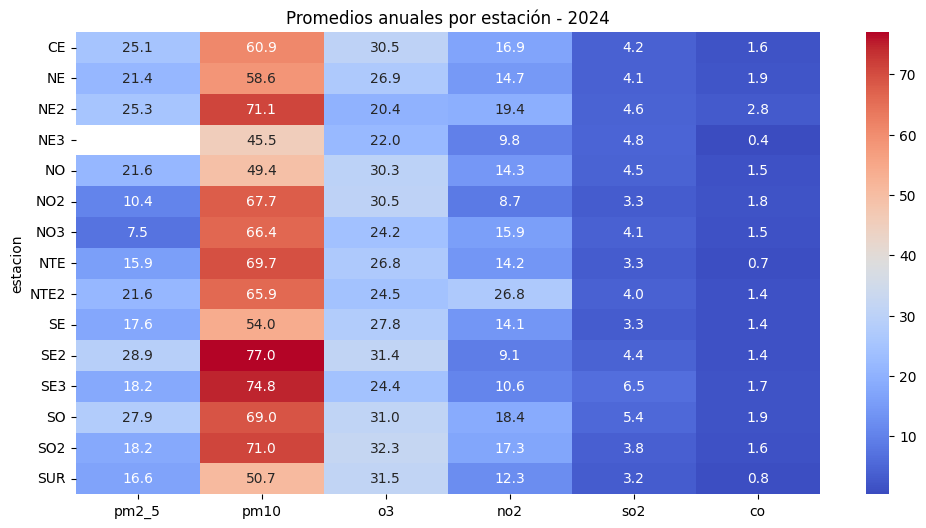

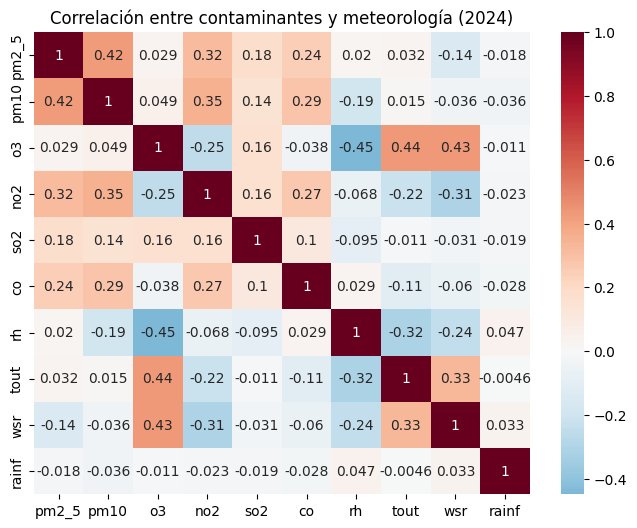

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Cargar dataset limpio 2024 ===
df = pd.read_csv("sima_2024_final_imputado_v2.csv", parse_dates=["fecha_y_hora"])

# --- 1. COMPRENSIÓN ---
print("Dimensiones:", df.shape)
print("\nVariables:")
print(df.dtypes)

# % de nulos
print("\n% de nulos por variable:")
print(df.isna().mean()*100)

# --- 2. DISTRIBUCIONES ---
vars_contaminantes = ["pm2_5","pm10","o3","no2","so2","co"]

for col in vars_contaminantes:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribución {col}")
    plt.show()

# --- 3. PROMEDIOS MENSUALES ---
df["month"] = df["fecha_y_hora"].dt.month
df["year"] = df["fecha_y_hora"].dt.year

monthly = df.groupby("month")[vars_contaminantes].mean()
monthly.plot(kind="bar", figsize=(12,6))
plt.title("Promedios mensuales de contaminantes (2024)")
plt.ylabel("Concentración promedio")
plt.show()

# --- 4. PROMEDIOS POR ESTACIÓN ---
station_avg = df.groupby("estacion")[vars_contaminantes].mean()
plt.figure(figsize=(12,6))
sns.heatmap(station_avg, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Promedios anuales por estación - 2024")
plt.show()

# --- 5. CORRELACIÓN ---
plt.figure(figsize=(8,6))
sns.heatmap(df[vars_contaminantes+["rh","tout","wsr","rainf"]].corr(),
            annot=True, cmap="RdBu_r", center=0)
plt.title("Correlación entre contaminantes y meteorología (2024)")
plt.show()
